In [584]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [585]:
df = pd.read_csv(r'C:\Users\dell\zomato_food_delivery_time_prediction\data\raw\Zomato-Dataset.csv')
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [586]:
df.sample(20)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
34699,0x5cb8,MUMRES09DEL02,26.0,4.3,18.994049,72.825203,19.124049,72.955203,23-03-2022,21:50,0.916666667,Cloudy,Jam,1,Buffet,motorcycle,2.0,No,Metropolitian,41
38765,0x5750,COIMBRES19DEL02,33.0,4.7,11.022298,76.998349,11.102298,77.078349,14-03-2022,22:25,22:40,Windy,Low,2,Buffet,motorcycle,1.0,No,NaN,20
28403,0x2f65,MYSRES04DEL01,20.0,4.6,12.308500,76.665808,12.318500,76.675808,28-03-2022,09:50,0.416666667,Sandstorms,Low,2,Snack,electric_scooter,0.0,No,Urban,10
13353,0x6653,VADRES14DEL03,26.0,4.8,22.311603,73.165012,22.401603,73.255012,18-03-2022,22:30,22:35,Fog,Low,2,Drinks,motorcycle,0.0,No,Metropolitian,22
40674,0x7f22,PUNERES17DEL01,34.0,4.3,18.530963,73.828972,18.600963,73.898972,16-03-2022,21:10,21:25,Windy,Jam,2,Snack,electric_scooter,1.0,No,Metropolitian,44
26351,0xb343,HYDRES15DEL02,20.0,4.5,17.459710,78.368855,17.509710,78.418855,01-04-2022,19:15,19:30,Stormy,Jam,1,Snack,scooter,1.0,No,Metropolitian,21
3216,0x7ed9,VADRES05DEL03,38.0,4.9,22.310526,73.170937,22.400526,73.260937,29-03-2022,0.833333333,20:05,Stormy,Jam,1,Snack,scooter,1.0,No,Metropolitian,26
40846,0x5e74,MYSRES16DEL01,30.0,4.3,12.316967,76.603067,12.326967,76.613067,07-03-2022,11:40,11:50,Fog,High,1,Drinks,motorcycle,0.0,No,NaN,31
12573,0xcacd,LUDHRES20DEL01,31.0,4.8,30.885915,75.788259,30.925915,75.828259,15-02-2022,14:40,14:45,Sandstorms,High,0,Buffet,motorcycle,1.0,No,Metropolitian,33
14153,0x137f,RANCHIRES17DEL01,NaN,NaN,23.374878,85.335739,23.384878,85.345739,17-03-2022,NaN,11:10,NaN,NaN,3,Buffet,bicycle,1.0,No,Metropolitian,14


In [587]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [588]:
df.shape

(45584, 20)

In [589]:
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [590]:
df.sample(10)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
26267,0x8ffe,CHENRES05DEL01,21.0,4.3,13.058616,80.264151,13.128616,80.334151,06-03-2022,19:50,0.833333333,Sandstorms,Jam,0,Meal,motorcycle,1.0,No,Metropolitian,37
16010,0x306f,VADRES16DEL02,38.0,4.6,0.000000,0.000000,0.080000,0.080000,08-03-2022,23:40,23:45,Windy,Low,1,Buffet,scooter,1.0,No,Metropolitian,24
11784,0xd60,BANGRES010DEL02,NaN,NaN,12.933298,77.614293,13.013298,77.694293,14-03-2022,NaN,17:55,Cloudy,Medium,1,Snack,scooter,1.0,No,Urban,32
18185,0x51a1,MUMRES09DEL01,22.0,4.6,18.994049,72.825203,19.064049,72.895203,02-04-2022,20:35,20:45,Sunny,Jam,1,Meal,scooter,1.0,No,Metropolitian,21
15448,0xa257,MYSRES05DEL02,39.0,4.8,12.323978,76.627961,12.403978,76.707961,16-03-2022,22:30,22:35,Cloudy,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,44
13556,0x9190,MUMRES17DEL03,30.0,4.9,19.121999,72.908493,19.181999,72.968493,19-03-2022,22:45,22:50,Stormy,Low,2,Snack,motorcycle,1.0,No,Metropolitian,24
31024,0x560d,COIMBRES11DEL02,28.0,4.8,11.001753,76.986241,11.131753,77.116241,27-03-2022,17:45,17:55,Stormy,Medium,0,Drinks,motorcycle,1.0,No,Metropolitian,33
14760,0x1676,MUMRES08DEL01,38.0,4.6,19.065838,72.832658,19.135838,72.902658,02-03-2022,22:30,22:40,Sunny,Low,2,Meal,scooter,1.0,No,NaN,17
45574,0x5193,MYSRES13DEL02,36.0,4.8,12.310972,76.659264,12.440972,76.789264,18-03-2022,21:10,21:20,Sunny,Jam,2,Drinks,electric_scooter,1.0,No,Urban,29
25293,0x74f2,PUNERES010DEL02,21.0,4.8,18.539299,73.897902,18.559299,73.917902,30-03-2022,08:10,08:20,Windy,Low,1,Snack,scooter,1.0,No,Metropolitian,19


In [591]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
count,43730.000000,43676.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,44591.000000,45584.000000
mean,29.566911,4.633774,17.017948,70.229684,17.465480,70.844161,1.023385,0.744635,26.293963
std,5.815064,0.334744,8.185674,22.885575,7.335562,21.120578,0.839055,0.572510,9.384298
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,12.933284,73.170000,12.988453,73.280000,0.000000,0.000000,19.000000
50%,30.000000,4.700000,18.551440,75.897963,18.633934,76.002574,1.000000,1.000000,26.000000
75%,35.000000,4.900000,22.728163,78.044095,22.785049,78.107044,2.000000,1.000000,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000


In [592]:
df["ID"].duplicated().sum()

np.int64(0)

In [593]:
df['ID'].duplicated().sum()

np.int64(0)

In [594]:
df = df.drop(columns=['ID'])
df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [595]:
df['Delivery_person_ID'].value_counts()

Delivery_person_ID
PUNERES01DEL01    67
JAPRES11DEL02     67
HYDRES04DEL02     66
JAPRES03DEL01     66
VADRES08DEL02     66
                  ..
BHPRES15DEL03      7
DEHRES18DEL03      7
KOCRES16DEL03      6
KOLRES09DEL03      6
BHPRES010DEL03     5
Name: count, Length: 1320, dtype: int64

In [596]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_ID           45584 non-null  object 
 1   Delivery_person_Age          43730 non-null  float64
 2   Delivery_person_Ratings      43676 non-null  float64
 3   Restaurant_latitude          45584 non-null  float64
 4   Restaurant_longitude         45584 non-null  float64
 5   Delivery_location_latitude   45584 non-null  float64
 6   Delivery_location_longitude  45584 non-null  float64
 7   Order_Date                   45584 non-null  object 
 8   Time_Orderd                  43853 non-null  object 
 9   Time_Order_picked            45584 non-null  object 
 10  Weather_conditions           44968 non-null  object 
 11  Road_traffic_density         44983 non-null  object 
 12  Vehicle_condition            45584 non-null  int64  
 13  Type_of_order   

## renaming the features

In [597]:
columns = {"Delivery_person_ID" : "rider_id","Delivery_person_Age" : "rider_age","Delivery_person_Ratings" : "rider_ratings","Restaurent_latitude" : "restaurent_lat","Restaurent_longitude" : "restaurent_long","Delivery_location_latitude" : "delivery_latitude","Delivery_location_longitude" : "delivery_longitude","Order_Date" : "order_date","Time_Ordered" : "order_time", "Time_order_picked" : "pickup_time", "Weather_condition" : "weather","Road_traffic_density" : "traffic","vehicle_condition" : "vehicle_condition","Type_of_order" : "order_type","Type_of_vehicle" : "vehicle_type","multiple_deliveries" : "multiple_deliveries","Festival" : "festival","City" : "city_type","Time_taken (min)" : "time_taken (min)"}

In [598]:
df = df.rename(columns = {"Delivery_person_ID" : "rider_id",
                     "Delivery_person_Age" : "rider_age",
                     "Delivery_person_Ratings" : "rider_ratings",
                     "Restaurant_latitude" : "restaurant_lat",
                     "Restaurant_longitude" : "restaurant_long",
                     "Delivery_location_latitude" : "delivery_lat",
                     "Delivery_location_longitude" : "delivery_long",
                     "Order_Date" : "order_date",
                     "Time_Orderd" : "order_time", 
                     "Time_Order_picked" : "pickup_time", 
                     "Weather_conditions" : "weather",
                     "Road_traffic_density" : "traffic",
                     "Vehicle_condition" : "vehicle_condition",
                     "Type_of_order" : "order_type",
                     "Type_of_vehicle" : "vehicle_type",
                     "multiple_deliveries" : "multiple_deliveries",
                     "Festival" : "festival",
                     "City" : "city_type",
                     "Time_taken (min)" : "time_taken (min)"}
         )

In [599]:
df.head()

,rider_id,rider_age,rider_ratings,restaurant_lat,restaurant_long,delivery_lat,delivery_long,order_date,order_time,pickup_time,weather,traffic,vehicle_condition,order_type,vehicle_type,multiple_deliveries,festival,city_type,time_taken (min)
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [600]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rider_id             45584 non-null  object 
 1   rider_age            43730 non-null  float64
 2   rider_ratings        43676 non-null  float64
 3   restaurant_lat       45584 non-null  float64
 4   restaurant_long      45584 non-null  float64
 5   delivery_lat         45584 non-null  float64
 6   delivery_long        45584 non-null  float64
 7   order_date           45584 non-null  object 
 8   order_time           43853 non-null  object 
 9   pickup_time          45584 non-null  object 
 10  weather              44968 non-null  object 
 11  traffic              44983 non-null  object 
 12  vehicle_condition    45584 non-null  int64  
 13  order_type           45584 non-null  object 
 14  vehicle_type         45584 non-null  object 
 15  multiple_deliveries  44591 non-null 

In [601]:
df.head()

,rider_id,rider_age,rider_ratings,restaurant_lat,restaurant_long,delivery_lat,delivery_long,order_date,order_time,pickup_time,weather,traffic,vehicle_condition,order_type,vehicle_type,multiple_deliveries,festival,city_type,time_taken (min)
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


## rider_age

In [602]:
df['rider_age'].describe()

count    43730.000000
mean        29.566911
std          5.815064
min         15.000000
25%         25.000000
50%         30.000000
75%         35.000000
max         50.000000
Name: rider_age, dtype: float64

In [603]:
df['rider_age'].isna().sum()

np.int64(1854)

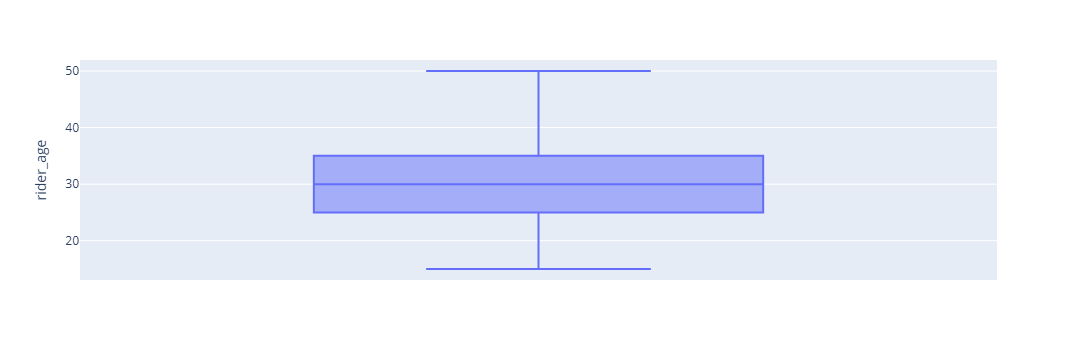

In [604]:
import plotly.express as px
fig = px.box(df, y="rider_age")
fig.show()

In [605]:
rider_age_index = df[df['rider_age'] < 18].index

In [606]:
rider_age_index

Index([ 2378,  2896,  2942,  5893,  9147, 10891, 11116, 12084, 15115, 15918,
       16075, 16453, 21213, 22282, 23026, 23479, 23635, 23655, 25864, 26624,
       26908, 27109, 27933, 27994, 29655, 31207, 31950, 33189, 34944, 36012,
       37091, 37667, 39064, 39073, 40276, 41232, 44394, 44872],
      dtype='int64')

In [607]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rider_id             45584 non-null  object 
 1   rider_age            43730 non-null  float64
 2   rider_ratings        43676 non-null  float64
 3   restaurant_lat       45584 non-null  float64
 4   restaurant_long      45584 non-null  float64
 5   delivery_lat         45584 non-null  float64
 6   delivery_long        45584 non-null  float64
 7   order_date           45584 non-null  object 
 8   order_time           43853 non-null  object 
 9   pickup_time          45584 non-null  object 
 10  weather              44968 non-null  object 
 11  traffic              44983 non-null  object 
 12  vehicle_condition    45584 non-null  int64  
 13  order_type           45584 non-null  object 
 14  vehicle_type         45584 non-null  object 
 15  multiple_deliveries  44591 non-null 

## removed rows where age is less than 18

In [608]:
df = df.drop(rider_age_index)

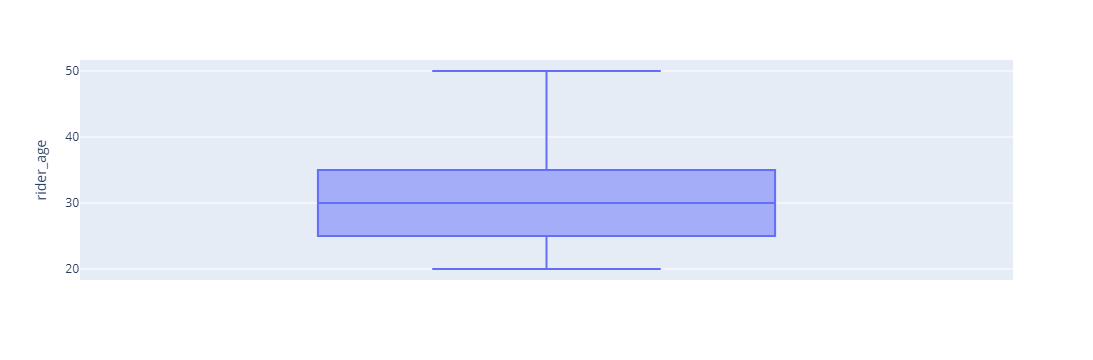

In [609]:
fig = px.box(df, y="rider_age")
fig.show()

In [610]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45546 entries, 0 to 45583
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rider_id             45546 non-null  object 
 1   rider_age            43692 non-null  float64
 2   rider_ratings        43638 non-null  float64
 3   restaurant_lat       45546 non-null  float64
 4   restaurant_long      45546 non-null  float64
 5   delivery_lat         45546 non-null  float64
 6   delivery_long        45546 non-null  float64
 7   order_date           45546 non-null  object 
 8   order_time           43853 non-null  object 
 9   pickup_time          45546 non-null  object 
 10  weather              44968 non-null  object 
 11  traffic              44983 non-null  object 
 12  vehicle_condition    45546 non-null  int64  
 13  order_type           45546 non-null  object 
 14  vehicle_type         45546 non-null  object 
 15  multiple_deliveries  44553 non-null  floa

## in all rows where rider_age is 50 the rider_ratings is 6 

In [611]:
df[df['rider_age'] == 50]

,rider_id,rider_age,rider_ratings,restaurant_lat,restaurant_long,delivery_lat,delivery_long,order_date,order_time,pickup_time,weather,traffic,vehicle_condition,order_type,vehicle_type,multiple_deliveries,festival,city_type,time_taken (min)
3577,BANGRES05DEL01,50.0,6.0,-12.970324,-77.645748,13.010324,77.685748,13-03-2022,NaN,12:30,NaN,NaN,3,Meal,electric_scooter,0.0,No,Urban,25
4705,HYDRES17DEL01,50.0,6.0,-17.451976,-78.385883,17.561976,78.495883,04-04-2022,NaN,23:20,NaN,NaN,3,Snack,bicycle,0.0,No,Metropolitian,27
5160,JAPRES08DEL01,50.0,6.0,-26.910262,-75.783013,27.020262,75.893013,18-03-2022,NaN,18:50,NaN,NaN,3,Drinks,scooter,1.0,No,Metropolitian,20
5353,BANGRES19DEL01,50.0,6.0,12.914264,77.678400,13.024264,77.788400,06-04-2022,NaN,20:55,NaN,NaN,3,Meal,electric_scooter,1.0,No,Metropolitian,18
5642,AGRRES13DEL02,50.0,6.0,-27.159795,-78.042990,27.209795,78.092990,13-02-2022,NaN,18:05,NaN,NaN,3,Drinks,scooter,1.0,No,Metropolitian,20
6385,JAPRES06DEL02,50.0,6.0,26.911927,75.797282,27.041927,75.927282,02-04-2022,NaN,22:10,NaN,NaN,3,Meal,electric_scooter,0.0,No,Urban,20
7022,MYSRES15DEL02,50.0,6.0,-12.352058,-76.606650,12.372058,76.626650,15-03-2022,NaN,0.416666667,NaN,NaN,3,Buffet,scooter,1.0,No,Metropolitian,14
7672,VADRES09DEL01,50.0,6.0,0.000000,0.000000,0.010000,0.010000,21-03-2022,NaN,08:35,NaN,NaN,3,Meal,bicycle,1.0,No,Metropolitian,22
9490,BANGRES010DEL01,50.0,6.0,12.933298,77.614293,13.003298,77.684293,12-03-2022,NaN,18:25,NaN,NaN,3,Drinks,scooter,1.0,No,Urban,17
9526,RANCHIRES13DEL01,50.0,6.0,-23.374989,-85.335486,23.444989,85.405486,20-03-2022,NaN,17:55,NaN,NaN,3,Snack,bicycle,1.0,No,Metropolitian,32


In [612]:
len(df[df['rider_age'] == 50])

53

## rider_ratings 

In [613]:
df['rider_ratings'].value_counts()

rider_ratings
4.8    7146
4.7    7140
4.9    7040
4.6    6938
5.0    3996
4.5    3302
4.1    1430
4.2    1418
4.3    1409
4.4    1360
4.0    1077
3.5     249
3.8     228
3.7     225
3.6     207
3.9     197
6.0      53
3.4      32
3.1      29
3.2      29
3.3      25
2.7      22
2.6      22
2.5      20
2.8      19
2.9      19
3.0       6
Name: count, dtype: int64

In [614]:
df['rider_ratings'].describe()

count    43638.000000
mean         4.636938
std          0.317242
min          2.500000
25%          4.500000
50%          4.700000
75%          4.900000
max          6.000000
Name: rider_ratings, dtype: float64

In [615]:
df['rider_ratings'].isna().sum()

np.int64(1908)

### removed those rows where rating is 6 

In [616]:
len(df[df['rider_ratings'] == 6])

53

In [617]:
rider_ratings_index = df[df['rider_ratings'] == 6].index

In [618]:
df = df.drop(rider_ratings_index)

In [619]:
df.head()

,rider_id,rider_age,rider_ratings,restaurant_lat,restaurant_long,delivery_lat,delivery_long,order_date,order_time,pickup_time,weather,traffic,vehicle_condition,order_type,vehicle_type,multiple_deliveries,festival,city_type,time_taken (min)
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [620]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45493 entries, 0 to 45583
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rider_id             45493 non-null  object 
 1   rider_age            43639 non-null  float64
 2   rider_ratings        43585 non-null  float64
 3   restaurant_lat       45493 non-null  float64
 4   restaurant_long      45493 non-null  float64
 5   delivery_lat         45493 non-null  float64
 6   delivery_long        45493 non-null  float64
 7   order_date           45493 non-null  object 
 8   order_time           43853 non-null  object 
 9   pickup_time          45493 non-null  object 
 10  weather              44968 non-null  object 
 11  traffic              44983 non-null  object 
 12  vehicle_condition    45493 non-null  int64  
 13  order_type           45493 non-null  object 
 14  vehicle_type         45493 non-null  object 
 15  multiple_deliveries  44500 non-null  floa

<Axes: >

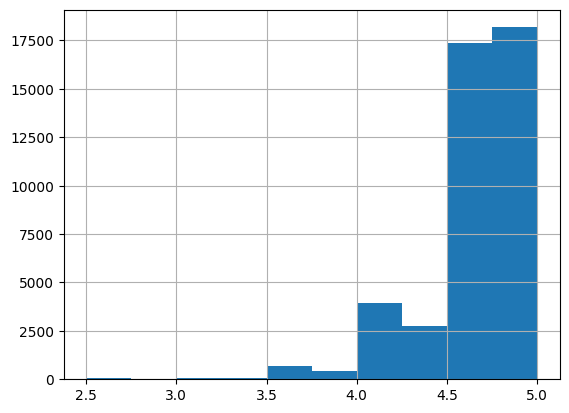

In [621]:
df['rider_ratings'].hist()

<Axes: >

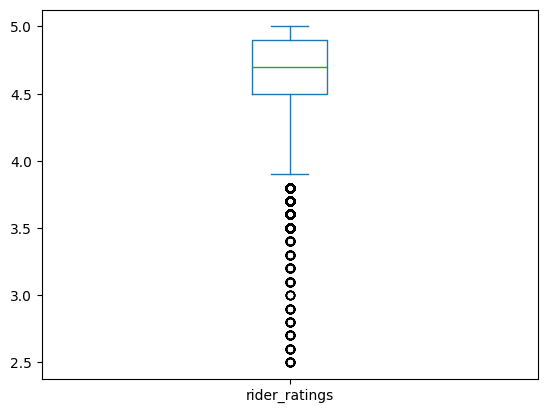

In [622]:
df['rider_ratings'].plot(kind='box')

In [623]:
df['rider_ratings'].sample(10)

5616     5.0
33045    3.9
27237    4.5
33463    4.8
42357    5.0
36014    4.6
17639    4.2
23856    4.8
17085    4.6
30019    4.7
Name: rider_ratings, dtype: float64

In [624]:
df['rider_ratings'].describe()

count    43585.000000
mean         4.635280
std          0.313851
min          2.500000
25%          4.500000
50%          4.700000
75%          4.900000
max          5.000000
Name: rider_ratings, dtype: float64

In [625]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45493 entries, 0 to 45583
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rider_id             45493 non-null  object 
 1   rider_age            43639 non-null  float64
 2   rider_ratings        43585 non-null  float64
 3   restaurant_lat       45493 non-null  float64
 4   restaurant_long      45493 non-null  float64
 5   delivery_lat         45493 non-null  float64
 6   delivery_long        45493 non-null  float64
 7   order_date           45493 non-null  object 
 8   order_time           43853 non-null  object 
 9   pickup_time          45493 non-null  object 
 10  weather              44968 non-null  object 
 11  traffic              44983 non-null  object 
 12  vehicle_condition    45493 non-null  int64  
 13  order_type           45493 non-null  object 
 14  vehicle_type         45493 non-null  object 
 15  multiple_deliveries  44500 non-null  floa

## order_date 

In [626]:
df['order_date'].isna().sum()

np.int64(0)

In [627]:
df['order_date'].describe()

count          45493
unique            44
top       15-03-2022
freq            1190
Name: order_date, dtype: object

In [628]:
df['order_date'].min()

'01-03-2022'

In [629]:
df['order_date'].max()

'31-03-2022'

### we have data from 1 march 2022 to 31 december 2022 this is maybe the data of one financial year or we can say ten months 

In [630]:
df['order_date'].dtype

dtype('O')

In [631]:
df.dtypes

rider_id                object
rider_age              float64
rider_ratings          float64
restaurant_lat         float64
restaurant_long        float64
delivery_lat           float64
delivery_long          float64
order_date              object
order_time              object
pickup_time             object
weather                 object
traffic                 object
vehicle_condition        int64
order_type              object
vehicle_type            object
multiple_deliveries    float64
festival                object
city_type               object
time_taken (min)         int64
dtype: object

In [632]:
df['order_date'].sample(20)

15781    10-03-2022
2842     25-03-2022
40722    21-03-2022
32755    13-03-2022
2907     11-03-2022
30871    09-03-2022
6931     16-03-2022
15782    06-03-2022
33169    04-03-2022
13659    23-03-2022
38354    15-02-2022
24963    27-03-2022
19996    05-04-2022
38389    19-03-2022
24420    06-03-2022
11230    24-03-2022
30821    07-03-2022
11688    10-03-2022
9419     17-02-2022
41032    18-02-2022
Name: order_date, dtype: object

In [633]:
import pandas as pd
import re

def find_bad_date_rows(df, col='order_date'):
    """
    Return rows where the date string in df[col] is 'unusual' according to:
      - must contain only digits and '-' (no letters, no other symbols)
      - must match common dash-separated date patterns like YYYY-MM-DD or DD-MM-YYYY or D-M-YY etc.
    
    The returned DataFrame contains two helper columns:
      - invalid_chars: True if there are letters or symbols other than '-'
      - pattern_ok: True if it matches a digit-digit-digit pattern with dashes (e.g. 2025-11-25 or 5-1-21)
    
    Example:
        bad = find_bad_date_rows(df, 'order_date')
    """
    s = df[col].astype(str).str.strip()

    # 1) invalid_chars: anything other than digits and dash is bad
    invalid_chars_mask = ~s.str.match(r'^[0-9-]+$')

    # 2) pattern_ok: a conservative set of allowed dash-separated date patterns
    #    Accepts:
    #       YYYY-MM-DD  -> 4-2-2 or 4-1-1 etc.
    #       DD-MM-YYYY  -> 1-2-4 etc.
    #       D-M-YY      -> 1-1-2 etc.
    #    Pattern: three groups of digits separated by single '-' (each group 1..4 digits)
    pattern_ok_mask = s.str.match(r'^\d{1,4}-\d{1,2}-\d{1,4}$')

    # 3) Also mark rows with problematic dash usage:
    #    - consecutive dashes, leading or trailing dash are invalid e.g. "-2025-11-25", "2025--11-25", "2025-11-25-"
    bad_dash_usage_mask = s.str.contains(r'(?:^-|-$|--)')

    # Final rule: a row is problematic if:
    #   - it contains invalid characters OR
    #   - it does not match the allowed pattern OR
    #   - it has bad dash usage
    problematic_mask = invalid_chars_mask | (~pattern_ok_mask) | bad_dash_usage_mask

    # Build result DataFrame with helper columns
    result = df.loc[problematic_mask].copy()
    result['_raw_order_date'] = s.loc[problematic_mask]
    result['invalid_chars'] = invalid_chars_mask.loc[problematic_mask].astype(bool)
    result['pattern_ok'] = pattern_ok_mask.loc[problematic_mask].astype(bool)
    result['bad_dash_usage'] = bad_dash_usage_mask.loc[problematic_mask].astype(bool)

    # Optional: sort so the easiest problems appear first
    result = result.sort_values(by=['invalid_chars', 'bad_dash_usage', 'pattern_ok'], ascending=[False, False, True])

    return result

In [634]:
bad_rows = find_bad_date_rows(df, 'order_date')
print(f"Found {len(bad_rows)} problematic rows")
bad_rows.head(20)

Found 0 problematic rows


,rider_id,rider_age,rider_ratings,restaurant_lat,restaurant_long,delivery_lat,delivery_long,order_date,order_time,pickup_time,...,order_type,vehicle_type,multiple_deliveries,festival,city_type,time_taken (min),_raw_order_date,invalid_chars,pattern_ok,bad_dash_usage


In [635]:
df['order_date'] = pd.to_datetime(df['order_date'], format="%d-%m-%Y")

In [636]:
df['order_date']

0       2022-02-12
1       2022-02-13
2       2022-03-04
3       2022-02-13
4       2022-02-14
           ...    
45579   2022-03-24
45580   2022-02-16
45581   2022-03-11
45582   2022-03-07
45583   2022-03-02
Name: order_date, Length: 45493, dtype: datetime64[ns]

In [637]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45493 entries, 0 to 45583
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   rider_id             45493 non-null  object        
 1   rider_age            43639 non-null  float64       
 2   rider_ratings        43585 non-null  float64       
 3   restaurant_lat       45493 non-null  float64       
 4   restaurant_long      45493 non-null  float64       
 5   delivery_lat         45493 non-null  float64       
 6   delivery_long        45493 non-null  float64       
 7   order_date           45493 non-null  datetime64[ns]
 8   order_time           43853 non-null  object        
 9   pickup_time          45493 non-null  object        
 10  weather              44968 non-null  object        
 11  traffic              44983 non-null  object        
 12  vehicle_condition    45493 non-null  int64         
 13  order_type           45493 non-null 

### order_time

In [638]:
df['order_time'].sample(20)

12520    20:50
9742     08:50
41542    20:30
25013    21:30
38717    17:35
37892    21:10
41824      NaN
29771    10:40
17993    13:40
1668     12:10
25257    18:50
40880    21:35
5826     10:55
38594    11:30
25416    17:15
27375    23:25
37734    19:20
10564    17:10
32046    23:15
4027     10:15
Name: order_time, dtype: object

In [639]:
df['order_time'].describe()

count     43853
unique      176
top       21:55
freq        461
Name: order_time, dtype: object

In [640]:
df['order_time'].info()

<class 'pandas.core.series.Series'>
Index: 45493 entries, 0 to 45583
Series name: order_time
Non-Null Count  Dtype 
--------------  ----- 
43853 non-null  object
dtypes: object(1)
memory usage: 710.8+ KB


In [641]:
df['order_time'].isna().sum()

np.int64(1640)

In [642]:
import pandas as pd
import numpy as np

def find_bad_time_rows(df, col='order_time'):
    """
    Return rows where the time string in df[col] is invalid according to strict 24-hour HH:MM rules.
    Valid format accepted: H or HH for hour (0-23) and exactly two digits for minute (00-59),
    e.g. "0:00", "00:00", "5:04", "23:59".
    
    The returned DataFrame contains helper boolean columns:
      - valid_format      : True if matches strict HH:MM (hours 0-23, minutes 00-59)
      - is_decimal        : True if looks like a decimal number (e.g. 0.644)
      - is_integer        : True if integer-like (e.g. "1", "15")
      - hhmm_general      : True if pattern H{1,2}:M{1,2} (may be out-of-range or single-digit minute)
      - out_of_range      : True if H or M numbers are outside 0-23 / 0-59 respectively
      - empty_or_null     : True if the value is NaN or an empty string
    """
    s = df[col].astype(str).str.strip()  # work with strings safely

    # Null / empty detection
    null_mask = df[col].isnull() | (s == '') | s.str.lower().isin(['nan', 'none', 'na'])

    # Strict valid HH:MM (hours 0-23, minutes 00-59). Non-capturing groups to avoid warnings.
    valid_mask = s.str.match(r'^(?:[01]?\d|2[0-3]):[0-5]\d$')

    # Decimal / float-like values (e.g., "0.644")
    is_decimal_mask = s.str.match(r'^\d+\.\d+$')

    # Integer-like values (e.g., "1", "15", "123")
    is_integer_mask = s.str.match(r'^\d+$')

    # General H:M pattern (1-2 digits : 1-2 digits) — further check for numeric ranges
    hhmm_general_mask = s.str.match(r'^\d{1,2}:\d{1,2}$')

    # Extract hour and minute when the general pattern holds
    extracted = s[hhmm_general_mask].str.extract(r'^(\d{1,2}):(\d{1,2})$')
    # convert to numeric safely
    if not extracted.empty:
        hours = pd.to_numeric(extracted[0], errors='coerce')
        mins  = pd.to_numeric(extracted[1], errors='coerce')
        out_of_range_sub = (hours > 23) | (mins > 59) | (hours < 0) | (mins < 0)
        # Build a Series aligned to full index (False where not hhmm_general)
        out_of_range_mask = pd.Series(False, index=s.index)
        out_of_range_mask.loc[hhmm_general_mask[hhmm_general_mask].index] = out_of_range_sub.values
    else:
        out_of_range_mask = pd.Series(False, index=s.index)

    # Final problematic mask: anything not matching strict valid mask OR null/empty
    problematic_mask = (~valid_mask) | null_mask

    # Build result
    result = df.loc[problematic_mask].copy()
    result['_raw_order_time'] = s.loc[problematic_mask]
    result['valid_format'] = valid_mask.loc[problematic_mask].astype(bool)
    result['empty_or_null'] = null_mask.loc[problematic_mask].astype(bool)
    result['is_decimal'] = is_decimal_mask.loc[problematic_mask].astype(bool)
    result['is_integer'] = is_integer_mask.loc[problematic_mask].astype(bool)
    result['hhmm_general'] = hhmm_general_mask.loc[problematic_mask].astype(bool)
    result['out_of_range'] = out_of_range_mask.loc[problematic_mask].astype(bool)

    # Add a human-friendly reason column
    def reason_row(r):
        if r['empty_or_null']:
            return 'empty_or_null'
        if r['valid_format']:
            return 'valid'
        reasons = []
        if r['is_decimal']:
            reasons.append('decimal_like')
        if r['is_integer']:
            reasons.append('integer_like')
        if r['hhmm_general']:
            if r['out_of_range']:
                reasons.append('hhmm_out_of_range')
            else:
                # e.g., minute was single-digit like "5:3" (hhmm_general True but strict valid False)
                reasons.append('hhmm_nonstandard (e.g., single-digit minute)')
        # any other non-matching format
        if not reasons:
            reasons.append('other_format')
        return ','.join(reasons)

    result['reason'] = result.apply(reason_row, axis=1)

    # order columns for readability
    cols = ['_raw_order_time', 'reason', 'valid_format', 'empty_or_null', 'is_decimal',
            'is_integer', 'hhmm_general', 'out_of_range']
    cols = [c for c in cols if c in result.columns]  # safe keep
    return result[cols]

In [643]:
bad = find_bad_time_rows(df, 'order_time')
print(f"Found {len(bad)} problematic rows")
bad.head(30)

Found 5708 problematic rows


,_raw_order_time,reason,valid_format,empty_or_null,is_decimal,is_integer,hhmm_general,out_of_range
28,0.458333333,decimal_like,False,False,True,False,False,False
31,0.958333333,decimal_like,False,False,True,False,False,False
33,nan,empty_or_null,False,True,False,False,False,False
38,0.791666667,decimal_like,False,False,True,False,False,False
65,nan,empty_or_null,False,True,False,False,False,False
71,0.875,decimal_like,False,False,True,False,False,False
83,0.958333333,decimal_like,False,False,True,False,False,False
111,nan,empty_or_null,False,True,False,False,False,False
116,1,integer_like,False,False,False,True,False,False
124,0.375,decimal_like,False,False,True,False,False,False


In [644]:
df['order_time'].dtype

dtype('O')

In [645]:
df['order_time'] = (
    df['order_time']
    .astype(str)
    .str.strip()
    .str.lower()
    .replace(['', 'nan', 'none', 'null', 'na', 'n/a'], np.nan)
)

In [646]:
df['order_time'].sample(20)

38102          22:45
39247          23:40
12635          19:25
11671          21:45
35027          18:30
42067          22:20
35923          23:15
30294    0.833333333
3397           21:40
32495          23:45
44341          21:20
32112          09:10
30560          08:20
43577    0.916666667
1571           21:15
32813          09:10
35936          23:50
1700           09:35
44194          20:45
30772          23:10
Name: order_time, dtype: object

In [647]:
# detect strings that look like decimals (e.g. "0.458333", "1.25", etc.)
decimal_like = df['order_time'].astype(str).str.match(r'^\d*\.\d+$', na=False)

# convert those to numeric (safe) and keep only values in [0, 1)
# (we allow 0.0 -> "00:00"; do NOT convert 1.0 or >= 1.0)
vals_num = pd.to_numeric(df.loc[decimal_like, 'order_time'], errors='coerce')
idxs_to_convert = vals_num[(vals_num >= 0) & (vals_num < 1)].index

# work on the fractional part (for values < 1, val % 1 == val)
vals_frac = vals_num.loc[idxs_to_convert] % 1

# convert fraction-of-day -> timedelta -> seconds -> HH:MM
td = pd.to_timedelta(vals_frac, unit='D')
secs = td.dt.total_seconds()
hours = (secs // 3600).astype(int)
mins  = ((secs % 3600) // 60).astype(int)

# write back zero-padded "HH:MM" strings only for the selected indexes
df.loc[idxs_to_convert, 'order_time'] = hours.astype(str).str.zfill(2) + ':' + mins.astype(str).str.zfill(2)

In [648]:
df['order_time'].sample(20)

11027    23:30
5954       NaN
14689    21:25
9893     23:50
19985    21:15
12869    20:55
14328    18:15
1246     10:00
17857    16:50
24831    22:55
27440    15:10
33584    19:00
21945        1
20389    21:00
19945    12:20
28233    19:00
23223    22:50
32926    10:55
38612    21:15
8741     12:55
Name: order_time, dtype: object

In [649]:
# convert to str + strip whitespace (to keep it clean)
s = df['order_time'].astype(str).str.strip()

# valid time patterns only
pat_hhmm   = r'^(?:[01]?\d|2[0-3]):[0-5]\d$'               # HH:MM
pat_hhmmss = r'^(?:[01]?\d|2[0-3]):[0-5]\d:[0-5]\d$'       # HH:MM:SS

# keep only valid HH:MM or HH:MM:SS
keep_mask = (
    s.str.match(pat_hhmm,   na=False) |
    s.str.match(pat_hhmmss, na=False)
)

# everything else → NaN
s[~keep_mask] = np.nan

df['order_time'] = s

In [650]:
df['order_time'].sample(20)

6360     17:15
5685     23:10
33939    12:45
26591    18:55
37327    17:40
9287     22:15
45476    18:10
18897    09:40
38899    21:35
25851    22:00
1400       NaN
28390    18:55
35616    22:40
6758     23:20
43801    10:30
12580    17:40
23572    17:20
30274    19:40
24867    19:59
13144    10:45
Name: order_time, dtype: object

In [651]:
# only operate on non-null rows; preserves np.nan
mask = df['order_time'].notna()
df.loc[mask, 'order_time'] = df.loc[mask, 'order_time'].astype(str).str.replace(r'\s+', '', regex=True)

In [652]:
df['order_time'].sample(20)

24509    21:40
41183    17:50
17234    22:20
33633    21:20
6518     17:15
12202    15:10
8704     17:50
21172    21:25
14866    20:50
20402    18:00
13278    17:30
5056     16:25
41246    22:45
39559    20:30
35973    17:55
42401    22:30
22939    20:25
39195    19:30
6094     08:15
13619    08:40
Name: order_time, dtype: object

In [653]:
df['order_time'].isnull().sum()

np.int64(2070)

In [655]:
df['order_time'] = pd.to_datetime(df['order_time'], format='%H:%M:%S', errors='coerce')

In [656]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45493 entries, 0 to 45583
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   rider_id             45493 non-null  object        
 1   rider_age            43639 non-null  float64       
 2   rider_ratings        43585 non-null  float64       
 3   restaurant_lat       45493 non-null  float64       
 4   restaurant_long      45493 non-null  float64       
 5   delivery_lat         45493 non-null  float64       
 6   delivery_long        45493 non-null  float64       
 7   order_date           45493 non-null  datetime64[ns]
 8   order_time           0 non-null      datetime64[ns]
 9   pickup_time          45493 non-null  object        
 10  weather              44968 non-null  object        
 11  traffic              44983 non-null  object        
 12  vehicle_condition    45493 non-null  int64         
 13  order_type           45493 non-null 